# Linguagem Julia
Filipe Braida

## Sumário
- Programação Científica
- Julia
- Básico sobre Julia
- Tipos Compostos
- Interfaces
- Modules
- Metaprogramming
- Calling Python
- Performance Types
- Workflow

## Computação Científica

Computação científica (ou ciência computacional) é o campo de estudo interessado na construção de modelos matemáticos (Wikipedia, 2017)

- A linguagem de programação é a ferramenta para construção desses modelos
- A LP precisa incorporar o domínio da aplicação!
  - Imaginem fazer _n_ operações matriciais em __C__ só para efetuar um cálculo simples de análise
- Linguagens comuns: __Matlab__, __Python (NumPy)__, __Octave__ e __R__

## Computação Científica

- Matlab
  - Não é gratuído
  - Lenta para problemas imperativos
- Octave
  - _Fork_ _free_ do Matlab
  - Muito lenta
  - Não possui todo o ferramental do Matlab (que é pago)

## Computação Científica

- Python
  - Proposito geral
  - Lento para problemas imperativos
  - Problema das duas linguagens
- R
  - Feito por e para estatístico
  - Problema das duas linguagens
  
Discussões sobre: [_why python is slow?_](https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/)

## Two Language Problem

O desenvolvimento é interativo hoje em dia

Linguagens não típadas e interpretadas podem facilmente resolver esse tipo de problema

Rápida prototipação e baixo custo de desenvolvimento são características necessárias!

Caso precise escalar a solução?

## Two Language Problem

Solução normalmente envolve na utilização de duas linguagens

Python, Matlab, Mathematica e outras para a investigação e o desenvolvimento do protótipo

C, Fortran para implementações com performance

# Julia

Linguagem de programação científica
- Devolvida por um grupo na universidade MIT
  - Desenvolvimento se iniciou em 2009 e foi lançada em 2012
  - Grupo possui grande experiência com paralelismo
- Open Source, _i.e._, free (Licença MIT)
- Versão: 0.60

"We are power Matlab users. Some of us are Lisp hackers. Some are Pythonistas, others Rubyists, still others Perl hackers. There are those of us who used Mathematica before we could grow facial hair. There are those who still can’t grow facial hair. We’ve generated more R plots than any sane person should. C is our desert island programming language."

https://julialang.org/blog/2012/02/why-we-created-julia

## Why Julia?


- You want to write code which is "slick" and readable
  - Code is read more than code is written!
- You want that same code to be fast
- You prefer to write everything in one language
- You are a developer: you want to write packages really fast which are really fast!

## Why Julia?
- You are a package user: you heard about some really cool Julia packages/metapackages (JuMP, Plots, DifferentialEquations), and want to use Julia
- Calling C, Fortran, Python, R, and MATLAB libraries, likely a combination of them, is necessary for your work
- You want built-in and easy native parallelism
- You want to build your own Domain-Specific Language (DSL), compiler, etc.

## Usando Julia

- REPL (Read--Eval--Print Loop)
- Em um Jupyter notebook (IJulia é o Kernel)
- Usando a IDE Juno (Atom + plugin)
- Na nuvem: JuliaBox

##  Básico

No caso do REPL, existe alguns comando úteis:

    ^D (sai do REPL, pode ser chamado também invocando exit(c) onde sai com o valor para o sistema contida em c);
    ^C (interrompe o cálculo vigente);
    ? (entra no modo help)
    ; (entra no modo system shell)
    colocando ; após a expressão, não será mostrado o valor de retorno no REPL.

In [1]:
apropos("randn") # procura na documentação a palavra "randn"

sprandn
randn!
randn


In [2]:
@edit max(1,2); # mostra a definição da função para os parâmetros correspondentes e por vim invoca o editor de texto padrão

LoadError: could not spawn `vim +239 /usr/bin/../share/julia/base/promotion.jl`: no such file or directory (ENOENT)

In [3]:
whos() # lista todas as variáveis globais e os seus tipos

                          Base  25072 KB     Module
                        Compat    400 KB     Module
                          Core   3166 KB     Module
                        IJulia    406 KB     Module
                          JSON    287 KB     Module
                          Main  28966 KB     Module
                        Nettle     61 KB     Module
                           ZMQ     85 KB     Module


In [4]:
cd("/home/juser") # muda o diretório local
pwd() # retorna o diretório local

LoadError: chdir /home/juser: no such file or directory (ENOENT)

In [5]:
include("file.jl") # executa o arquivo fonte. Gerará LoadError se a execução falhar

LoadError: could not open file /home/mcmartin/e-dev/UFRRJ/recomendation/file.jl

In [6]:
clipboard([1,2]) # copia o dado para o clipboard
clipboard() # carrega o dado do clipboard como string

Waiting for selection requests, Control-C to quit
  Waiting for selection request number 1


"exercise list"

In [7]:
workspace() # limpa o workspace - cria um novo módulo Main

## Tipos Básicos e Literais

In [8]:
1::Int64 # inteiro de 64-bit, diferente do inteiro de 32-bit em Julia

1

In [9]:
1.0::Float64 # float de 64-bit, pode existir: NaN, -Inf, Inf

1.0

In [27]:
true::Bool # boolean, tipo só com duas possibilidades: "true" e "false"

true

In [28]:
'c'::Char # character (Unicode)

'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

In [29]:
"s"::AbstractString # strings (Unicode)

"s"

## Tipos Básicos e Literais
- Todos os tipos básicos são imutáveis
- Especificar o tipo é opcional
  - Caso você não defina, Julia irá assumir o tipo
  - Existe diferença entre os tipos com 32-bit e 64-bit
  - Pode existe variação do tipo, como por 
      - Exemplo o Int, irá assumir dependendo da versão o Int64 ou Int32

## Hierarquia dos Tipos

![alt text](Images/Julia-Types.png "Frameworks")

In [24]:
function type_hierarchy(t::Type, level = 0)
    println(" "^level, t)
    for x in subtypes(t)
        type_hierarchy(x, level+2)
    end
end
type_hierarchy(Number)

Number
  Complex
  Real
    AbstractFloat
      BigFloat
      Float16
      Float32
      Float64
    Integer
      BigInt
      Bool
      Signed
        Int128
        Int16
        Int32
        Int64
        Int8
      Unsigned
        UInt128
        UInt16
        UInt32
        UInt64
        UInt8
    Irrational
    Rational


## Conversões e Promoções

In [8]:
Int64('a') # character to integer

97

In [9]:
Int64(2.0) # float to integer

2

In [10]:
Int64(1.3) # inexact error

LoadError: [91mInexactError()[39m

In [11]:
Int64("a") # error no conversion possible

LoadError: [91mMethodError: Cannot `convert` an object of type String to an object of type Int64
This may have arisen from a call to the constructor Int64(...),
since type constructors fall back to convert methods.[39m

In [12]:
Float64(1) # integer to float

1.0

In [13]:
Bool(1) # converts to boolean true

true

In [14]:
Bool(0) # converts to boolean false

false

In [15]:
Bool(2) # conversion error

LoadError: [91mInexactError()[39m

In [16]:
Char(89) # integer to char

'Y': ASCII/Unicode U+0059 (category Lu: Letter, uppercase)

In [17]:
string(true) # cast bool to string (works with other types, note small caps)

"true"

In [18]:
string(1,true) # string can take more than one argument and concatenate them

"1true"

## Tipos Complexos

In [31]:
Any # all objects are of this type

Any

In [32]:
Union{} # subtype of all types, no object can have this type

Union{}

In [33]:
Void # type indicating nothing, subtype of Any

Void

In [34]:
nothing # only instance of Void

    Additionally #undef indicates an incompletely initialized instance.

### Tuplas

Tuples are immutable sequences indexed from 1:

In [35]:
() # empty tuple

()

In [36]:
(1,) # one element tuple

(1,)

In [37]:
("a", 1) # two element tuple

("a", 1)

In [38]:
('a', false)::Tuple{Char, Bool} # tuple type assertion

('a', false)

In [39]:
x = (1, 2, 3)

(1, 2, 3)

In [40]:
x[1] # 1 (element)

1

In [41]:
x[1:2] # (1, 2) (tuple)

(1, 2)

In [42]:
x[4] # bounds error

LoadError: [91mBoundsError: attempt to access (1, 2, 3)
  at index [4][39m

In [43]:
x[1] = 1 # error - tuple is not mutable

LoadError: [91mMethodError: no method matching setindex!(::Tuple{Int64,Int64,Int64}, ::Int64, ::Int64)[39m

In [45]:
a, b = x # tuple unpacking a=1, b=2
println("$a $b")

1 2


### Arrays

Arrays are mutable and passed by reference. Array creation:

In [76]:
Array{Int64}(0, 0) # degenerate 0x0 array of Int64

0×0 Array{Int64,2}

In [48]:
Array{Any}(2, 3) # 2x3 array of Any

2×3 Array{Any,2}:
 #undef  #undef  #undef
 #undef  #undef  #undef

In [49]:
zeros(5) # vector of Float64 zeros

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [50]:
ones(5) # vector of Float64 ones

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

ones(Int64, 2, 1) # 2x1 array of Int64 ones

In [52]:
trues(3), falses(3) # tuple of vector of trues and of falses

(Bool[true, true, true], Bool[false, false, false])

In [53]:
eye(3) # 3x3 Float64 identity matrix

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [54]:
x = linspace(1, 2, 5) # iterator having 5 equally spaced elements

1.0:0.25:2.0

In [55]:
collect(x) # converts iterator to vector

5-element Array{Float64,1}:
 1.0 
 1.25
 1.5 
 1.75
 2.0 

In [56]:
1:10 # iterable from 1 to 10

1:10

In [57]:
reshape(1:12, 3, 4) # 3x4 array filled with 1:12 values

3×4 Base.ReshapedArray{Int64,2,UnitRange{Int64},Tuple{}}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [59]:
fill("a", 2, 2) # 2x2 array filled with "a"

2×2 Array{String,2}:
 "a"  "a"
 "a"  "a"

In [60]:
x = [1, 2] # two element vector

2-element Array{Int64,1}:
 1
 2

In [61]:
resize!(x, 5) # resize x in place to hold 5 values (filled with garbage)

5-element Array{Int64,1}:
      1
      2
 569348
      0
      0

In [62]:
[1] # vector with one element (not a scalar)

1-element Array{Int64,1}:
 1

In [63]:
[x * y for x in 1:2, y in 1:3] # comprehension generating 2x3 array

2×3 Array{Int64,2}:
 1  2  3
 2  4  6

In [64]:
Float64[x^2 for x in 1:4] # casting comprehension result to Float64

4-element Array{Float64,1}:
  1.0
  4.0
  9.0
 16.0

In [65]:
[1 2] # 1x2 matrix (hcat function)

1×2 Array{Int64,2}:
 1  2

In [66]:
[1 2]' # 2x1 matrix (after transposing)

2×1 Array{Int64,2}:
 1
 2

In [67]:
[1, 2] # vector (concatenation)

2-element Array{Int64,1}:
 1
 2

In [68]:
[1; 2] # vector (vcat function)

2-element Array{Int64,1}:
 1
 2

In [69]:
[1; 2] == [1 2]' # false, different array dimensions

false

In [70]:
[(1, 2)] # 1-element vector

1-element Array{Tuple{Int64,Int64},1}:
 (1, 2)

In [71]:
collect((1, 2)) # 2-element vector by tuple unpacking

2-element Array{Int64,1}:
 1
 2

In [72]:
[[1 2] 3] # append to a row vector (hcat)

1×3 Array{Int64,2}:
 1  2  3

In [73]:
[[1; 2]; 3] # append to a column vector (vcat)

3-element Array{Int64,1}:
 1
 2
 3


Vectors (1D arrays) are treated as column vectors.

Julia offers sparse and distributed matrices (see documentation for details).

Commonly needed array utility functions:

In [77]:
a = [x * y for x in 1:2, y in 1, z in 1:3] # 2x3 array of Int64; singelton dimension is dropped

2×3 Array{Int64,2}:
 1  1  1
 2  2  2

In [78]:
a = [x * y for x in 1:2, y in 1:1, z in 1:3] # 2x1x3 array of Int64; singelton dimension is not dropped

2×1×3 Array{Int64,3}:
[:, :, 1] =
 1
 2

[:, :, 2] =
 1
 2

[:, :, 3] =
 1
 2

In [80]:
ndims(a) # number of dimensions in a

3

In [81]:
eltype(a) # type of elements in a

Int64

In [86]:
length(a) # number of elements in a

6

In [85]:
size(a) # tuple containing dimension sizes of a

(2, 1, 3)

In [84]:
vec(a) # cast array to vetor (single dimension)

6-element Array{Int64,1}:
 1
 2
 1
 2
 1
 2

In [83]:
squeeze(a, 2) # remove 2nd dimension as it has size 1

2×3 Array{Int64,2}:
 1  1  1
 2  2  2

In [82]:
sum(a, 3) # calculate sums for 3rd dimensions, similarly: mean, std, prod, minimum, maximum, any, all

2×1×1 Array{Int64,3}:
[:, :, 1] =
 3
 6

In [87]:
count(x -> x > 0, a) # count number of times a predicate is true, similar: all, any

6

In [88]:
a = linspace(0, 1) # LinSpace{Float64} of length 50

0.0:0.02040816326530612:1.0

In [89]:
a[1] # get scalar 0.0

0.0

In [90]:
a[end] # get scalar 1.0 (last position)

1.0

In [91]:
a[1:2:end] # every second element from range, LinSpace{Float64}

0.0:0.04081632653061224:0.9795918367346939

In [92]:
a[repmat([true, false], 25)] # select every second element, Array{Float64,1}

25-element Array{Float64,1}:
 0.0      
 0.0408163
 0.0816327
 0.122449 
 0.163265 
 0.204082 
 0.244898 
 0.285714 
 0.326531 
 0.367347 
 0.408163 
 0.44898  
 0.489796 
 0.530612 
 0.571429 
 0.612245 
 0.653061 
 0.693878 
 0.734694 
 0.77551  
 0.816327 
 0.857143 
 0.897959 
 0.938776 
 0.979592 

In [93]:
a[[1, 3, 6]] # 1st, 3rd and 6th element of a, Array{Float64,1}

3-element Array{Float64,1}:
 0.0      
 0.0408163
 0.102041 

In [94]:
view(a, 1:2:50) # view into subsarray of a

25-element SubArray{Float64,1,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Tuple{StepRange{Int64,Int64}},true}:
 0.0      
 0.0408163
 0.0816327
 0.122449 
 0.163265 
 0.204082 
 0.244898 
 0.285714 
 0.326531 
 0.367347 
 0.408163 
 0.44898  
 0.489796 
 0.530612 
 0.571429 
 0.612245 
 0.653061 
 0.693878 
 0.734694 
 0.77551  
 0.816327 
 0.857143 
 0.897959 
 0.938776 
 0.979592 

In [95]:
endof(a) # last index of the collection a

50

In [96]:
a = reshape(1:12, 3, 4)

3×4 Base.ReshapedArray{Int64,2,UnitRange{Int64},Tuple{}}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [97]:
a[:, 1:2] # 3x2 matrix

3×2 Array{Int64,2}:
 1  4
 2  5
 3  6

In [98]:
a[:, 1] # 3 element vector

3-element Array{Int64,1}:
 1
 2
 3

In [99]:
a[1, :] # 4 element vector

4-element Array{Int64,1}:
  1
  4
  7
 10

In [100]:
a[1:1, :] # 1x4 matrix

1×4 Array{Int64,2}:
 1  4  7  10

In [101]:
a[:, :, 1, 1] # works 3x4 matrix

3×4 Array{Int64,2}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [102]:
a[:, :, :, [true]] # wroks 3x4x1 matrix

3×4×1×1 Array{Int64,4}:
[:, :, 1, 1] =
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [103]:
a[1, 1, [false]] # works 0-element Array{Int64,1}

0-element Array{Int64,1}

In [104]:
x = collect(reshape(1:8, 2, 4))

2×4 Array{Int64,2}:
 1  3  5  7
 2  4  6  8

In [105]:
x[:, 2:3] = [1 2] # error; size mismatch

LoadError: [91mDimensionMismatch("tried to assign 1×2 array to 2×2 destination")[39m

In [106]:
x[:, 2:3] = repmat([1 2], 2) # OK

2×2 Array{Int64,2}:
 1  2
 1  2

In [108]:
x[:, 2:3] = 3 # OK

3

Arrays are assigned and passed by reference. Therefore copying is provided:

In [110]:
x = Array{Any}(2)
x[1] = ones(2)
x[2] = trues(3)
a = x
b = copy(x) # shallow copy
c = deepcopy(x) # deep copy
x[1] = "Bang"
x[2][1] = false
x

2-element Array{Any,1}:
 "Bang"                 
 Bool[false, true, true]

In [112]:
a # identical as x

2-element Array{Any,1}:
 "Bang"                 
 Bool[false, true, true]

In [113]:
b # only x[2][1] changed from original x

2-element Array{Any,1}:
 [1.0, 1.0]             
 Bool[false, true, true]

In [114]:
c # contents to original x

2-element Array{Any,1}:
 [1.0, 1.0]            
 Bool[true, true, true]

In [115]:
[1 2]::Array{Int64, 2} # 2 dimensional array of Int64

1×2 Array{Int64,2}:
 1  2

In [116]:
[true; false]::Vector{Bool} # vector of Bool

2-element Array{Bool,1}:
  true
 false

In [56]:
[1 2; 3 4]::Matrix{Int64} # matrix of Int64

2×2 Array{Int64,2}:
 1  2
 3  4

## Dictionaries
Associative collections (key-value dictionaries):

In [54]:
x = Dict{Float64, Int64}() # empty dictionary mapping floats to integers

Dict{Float64,Int64} with 0 entries

In [55]:
y = Dict("a"=>1, "b"=>2) # filled dictionary

Dict{String,Int64} with 2 entries:
  "b" => 2
  "a" => 1

In [56]:
y["a"] # element retrieval

1

In [57]:
y["c"] # error

LoadError: [91mKeyError: key "c" not found[39m

In [58]:
y["c"] = 3 # added element

3

In [59]:
haskey(y, "b") # check if y contains key "b"

true

In [60]:
keys(y), values(y) # tuple of iterators returning keys and values in y

(String["c", "b", "a"], [3, 2, 1])

In [61]:
delete!(y, "b") # delete key from a collection, see also: pop!

Dict{String,Int64} with 2 entries:
  "c" => 3
  "a" => 1

In [62]:
get(y,"c","default") # return y["c"] or "default" if not haskey(y,"c")

3

## Funções

In Julia, a function is an object that maps a tuple of argument values to a return value.

In [27]:
function f(x,y)
    x + y
end

f (generic function with 1 method)

In [28]:
f(x,y) = x + y

f (generic function with 1 method)

In [29]:
f(2,3)

5

Without parentheses, the expression f refers to the function object, and can be passed around like any value:

In [33]:
g = f;
g(2,3)

5

As with variables, Unicode can also be used for function names:

In [34]:
∑(x,y) = x + y

∑ (generic function with 1 method)

In [35]:
∑(2, 3)

5

## Argument Passing Behavior

- Julia function arguments follow a convention sometimes called "pass-by-sharing"
  - values are not copied when they are passed to functions
- Function arguments themselves act as new variable bindings (new locations that can refer to values), but the values they refer to are identical to the passed values. 
- Modifications to mutable values (such as Arrays) made within a function will be visible to the caller. 
- This is the same behavior found in Scheme, most Lisps, Python, Ruby and Perl, among other dynamic languages.

## The return Keyword

The value returned by a function is the value of the last expression evaluated, which, by default, is the last expression in the body of the function definition

In [37]:
function h(x,y)
    return x * y
    x + y
end

h (generic function with 1 method)

In [39]:
h(2,3)

6

## Operators Are Functions
Most operators are just functions with support for special syntax

In [41]:
1 + 2 + 3


6

In [43]:
+(1,2,3)

6

In [46]:
w = +;
w(1,2,3)

6

The exceptions are operators with special evaluation semantics like && and ||
- These operators cannot be functions since Short-Circuit Evaluation requires that their operands are not evaluated before evaluation of the operator.

## Operators With Special Names

A few special expressions correspond to calls to functions with non-obvious names. These are:

| Expression        | Calls                  |
|:----------------- |:---------------------- |
| `[A B C ...]`     | [`hcat()`](@ref)       |
| `[A; B; C; ...]`  | [`vcat()`](@ref)       |
| `[A B; C D; ...]` | [`hvcat()`](@ref)      |
| `A'`              | [`ctranspose()`](@ref) |
| `A.'`             | [`transpose()`](@ref)  |
| `1:n`             | [`colon()`](@ref)      |
| `A[i]`            | [`getindex()`](@ref)   |
| `A[i]=x`          | [`setindex!()`](@ref)  |

## Anonymous Functions

- Functions in Julia are first-class objects
  - They can be assigned to variables, and called using the standard function call syntax from the variable they have been assigned to.

In [47]:
x -> x^2 + 2x - 1

(::#1) (generic function with 1 method)

In [49]:
function (x)
 x^2 + 2x - 1
end

(::#5) (generic function with 1 method)

A classic example is map(), which applies a function to each value of an array and returns a new array containing the resulting values:

In [50]:
map(round, [1.2,3.5,1.7])

3-element Array{Float64,1}:
 1.0
 4.0
 2.0

In [51]:
map(x -> x^2 + 2x - 1, [1,3,-1])

3-element Array{Int64,1}:
  2
 14
 -2

## Multiple Return Values

In [53]:
function foo(a,b)
    a+b, a*b
end

foo (generic function with 1 method)

In [56]:
foo(2,3)

(5, 6)

A typical usage of such a pair of return values, however, extracts each value into a variable. Julia supports simple tuple "destructuring" that facilitates this:

In [57]:
x, y = foo(2,3)

(5, 6)

## Varargs Functions

It is often convenient to be able to write functions taking an arbitrary number of arguments

In [58]:
bar(a,b,x...) = (a,b,x)

bar (generic function with 1 method)

In [59]:
bar(1,2)

(1, 2, ())

In [60]:
bar(1,2,3)

(1, 2, (3,))

In [61]:
bar(1, 2, 3, 4)

(1, 2, (3, 4))

In [62]:
bar(1,2,3,4,5,6)

(1, 2, (3, 4, 5, 6))

Also, the function that arguments are spliced into need not be a varargs function (although it often is):

In [63]:
x = [3,4]

2-element Array{Int64,1}:
 3
 4

In [64]:
bar(1,2,x...)

(1, 2, (3, 4))

In [66]:
x = [1,2,3,4];

In [68]:
bar(x...)

(1, 2, (3, 4))

## Optional Arguments

In many cases, function arguments have sensible default values and therefore might not need to be passed explicitly in every call

In [ ]:
function parse(type, num, base=10)
    ###
end

In [72]:
parse(Int,"12",10)

12

In [73]:
parse(Int,"12",3)

5

In [74]:
parse(Int,"12")

12

## Keyword Arguments
Some functions need a large number of arguments, or have a large number of behaviors

```julia
function plot(x, y; style="solid", width=1, color="black")
    ###
end
```

When the function is called, the semicolon is optional: one can either call `plot(x, y, width=2)`
or `plot(x, y; width=2)`

Extra keyword arguments can be collected using ..., as in varargs functions:
```julia
function f(x; y=0, kwargs...)
    ###
end
```

Inside f, kwargs will be a collection of (key,value) tuples, where each key is a symbol.

## Controle de Fluxo

There are two Julia constructs that accomplish this: begin blocks and (;) chains.

In [3]:
z = begin
   x = 1
   y = 2
   x + y
end

3

In [4]:
z = (x = 1; y = 2; x + y)

3

In [5]:
begin x = 1; y = 2; x + y end

3

In [6]:
(x = 1;
y = 2;
x + y)

3

## Conditional Evaluation
Conditional evaluation allows portions of code to be evaluated or not evaluated depending on the value of a boolean expression

In [7]:
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

x is less than y


In [9]:
x = 1; y = 2;
println(x < y ? "less than" : "not less than")

less than


## Repeated Evaluation: Loops

There are two constructs for repeated evaluation of expressions: the while loop and the for loop. Here is an example of a while loop:

In [11]:
i = 1;
while i <= 5
   println(i)
   i += 1
end

1
2
3
4
5


In [13]:
for i = 1:5
   println(i)
end


1
2
3
4
5


In general, the for loop construct can iterate over any container. In these cases, the alternative (but fully equivalent) keyword in or ∈ is typically used instead of =, since it makes the code read more clearly:

In [16]:
for i in [1,4,0]
   println(i)
end

1
4
0


In [18]:
for s ∈ ["foo","bar","baz"]
   println(s)
end

foo
bar
baz


## Break and Continue

In [20]:
i = 1;
while true
   println(i)
   if i >= 5
       break
   end
   i += 1
end

1
2
3
4
5


In [22]:
for i = 1:10
   if i % 3 != 0
       continue
   end
   println(i)
end

3
6
9


Multiple nested for loops can be combined into a single outer loop, forming the cartesian product of its iterables:

In [1]:
for i = 1:2, j = 3:4
   println((i, j))
end

(1, 3)


## Escopo das Variáveis

The following constructs introduce new variable scope: function, while, for, try/catch, let, type.
You can define variables as:
- global: use variable from global scope;
- local: define new variable in current scope;
- const: ensure variable type is constant (global only).


## Tipos Compostos

Composite types are called records, structs, or objects in various languages. You can define and access composite types:

In [24]:
struct Foo
   bar
   baz::Int
   qux::Float64
end
foo = Foo("Hello, world.", 23, 1.5)

Foo("Hello, world.", 23, 1.5)

In [6]:
typeof(foo)

Foo

In [8]:
Foo((), 23.5, 1)

LoadError: [91mInexactError()[39m

You may find a list of field names using the fieldnames function.

In [14]:
fieldnames(foo)

3-element Array{Symbol,1}:
 :bar
 :baz
 :qux

You can access the field values of a composite object using the traditional foo.bar notation:

In [17]:
foo.bar

"Hello, world."

Composite objects declared with struct are immutable; they cannot be modified after construction. This may seem odd at first, but it has several advantages:

- It can be more efficient. Some structs can be packed efficiently into arrays, and in some cases the compiler is able to avoid allocating immutable objects entirely.

- It is not possible to violate the invariants provided by the type's constructors.

- Code using immutable objects can be easier to reason about.

In [25]:
foo.bar = "oi"

LoadError: [91mtype Foo is immutable[39m

## Mutable Composite Types


In [22]:
mutable struct Bar
   baz
   qux::Float64
end
bar = Bar("Hello", 1.5)

Bar("Hello", 1.5)

In [23]:
bar.qux = 2.0

2.0

In order to support mutation, such objects are generally allocated on the heap, and have stable memory addresses

To recap, two essential properties define immutability in Julia:

- An object with an immutable type is passed around (both in assignment statements and in function calls) by copying, whereas a mutable type is passed around by reference.

- It is not permitted to modify the fields of a composite immutable type.

## Abstract Types
Abstract types cannot be instantiated, and serve only as nodes in the type graph, thereby describing sets of related concrete types: those concrete types which are their descendants

In [27]:
abstract type SuperTipo end
abstract type SubTipo <: SuperTipo end

When no supertype is given, the default supertype is Any

Let's consider some of the abstract types that make up Julia's numerical hierarchy:

In [28]:
abstract type Number end
abstract type Real     <: Number end
abstract type AbstractFloat <: Real end
abstract type Integer  <: Real end
abstract type Signed   <: Integer end
abstract type Unsigned <: Integer end

It can also be used in expressions as a subtype operator which returns true when its left operand is a subtype of its right operand:

In [31]:
Integer <: Number

true

In [32]:
Integer <: AbstractFloat

false

## Type Unions

A type union is a special abstract type which includes as objects all instances of any of its argument types, constructed using the special Union function:

In [33]:
IntOrString = Union{Int,AbstractString}

Union{AbstractString, Int64}

In [34]:
1 :: IntOrString

1

In [36]:
"Hello!" :: IntOrString

"Hello!"

In [35]:
1.0 :: IntOrString

LoadError: [91mTypeError: typeassert: expected Union{AbstractString, Int64}, got Float64[39m

## Parametric Types

An important and powerful feature of Julia's type system is that it is parametric: types can take parameters, so that type declarations actually introduce a whole family of new types – one for each possible combination of parameter values



Type parameters are introduced immediately after the type name, surrounded by curly braces:

In [44]:
struct Ponto{T}
   x::T
   y::T
end

In [46]:
Ponto{Float64}

Ponto{Float64}

In [47]:
Ponto{AbstractString}

Ponto{AbstractString}

Point itself is also a valid type object, containing all instances Point{Float64}, Point{AbstractString}, etc. as subtypes:

In [49]:
Ponto{Float64} <: Ponto

true

In [51]:
Ponto{AbstractString} <: Ponto

true

Other types, of course, are not subtypes of it:

In [52]:
Float64 <: Ponto

false

In [53]:
AbstractString <: Ponto

false

Concrete Point types with different values of T are never subtypes of each other:

In [54]:
Ponto{Float64} <: Ponto{Int64}

false

In [55]:
Ponto{Float64} <: Ponto{Real}

false

## Interfaces

A lot of the power and extensibility in Julia comes from a collection of informal interfaces. By extending a few specific methods to work for a custom type, objects of that type not only receive those functionalities, but they are also able to be used in other methods that are written to generically build upon those behaviors.

## Iteration

```julia
for i in iter   # or  "for i = iter"
    # body
end
```

is translated into:

```julia
state = start(iter)
while !done(iter, state)
    (i, state) = next(iter, state)
    # body
end
```

## Indexing


| Methods to implement | Brief description                |
|:-------------------- |:-------------------------------- |
| `getindex(X, i)`     | `X[i]`, indexed element access   |
| `setindex!(X, v, i)` | `X[i] = v`, indexed assignment   |
| `endof(X)`           | The last index, used in `X[end]` |

## Modules

Modules in Julia are separate variable workspaces, i.e. they introduce a new global scope. They
are delimited syntactically, inside `module Name ... end`

Modules allow you to create top-level
definitions (aka global variables) without worrying about name conflicts when your code is used
together with somebody else's

In [ ]:
module MyModule

export aaa, bbb

aaa() = "x"
bbb() = "y"
p() = "p"

end

In [42]:
using MyModule

In [44]:
aaa()

"x"

In [46]:
MyModule.p()

"p"

In [47]:
p()

LoadError: [91mUndefVarError: p not defined[39m

## Packages

Julia has a built-in package manager for installing add-on functionality written in Julia.

It can also install external libraries using your operating system's standard system for doing so, or by compiling from source. 

The list of registered Julia packages can be found at http://pkg.julialang.org.

In [27]:
Pkg.status()

1 required packages:
 - RDatasets                     0.2.0
16 additional packages:
 - Compat                        0.26.0
 - DataArrays                    0.5.3
 - DataFrames                    0.10.0
 - DataStructures                0.5.3
 - DatasetsCF                    0.0.0-             master (unregistered)
 - Distances                     0.4.1
 - FileIO                        0.4.1
 - GZip                          0.3.0
 - Iterators                     0.3.1
 - MLBase                        0.6.1
 - Persa                         0.0.0-             master (unregistered)
 - RData                         0.1.0
 - Reexport                      0.0.3
 - SortingAlgorithms             0.1.1
 - SpecialFunctions              0.1.1
 - StatsBase                     0.17.0


In [ ]:
Pkg.add("Distributions")

## Metaprogramming

## Plotting
There are several plotting packages for Julia: Winston, Gadfly and PyPlot.

In [1]:
using Gadfly
srand(1) # second plot
x, y = randn(100), randn(100);

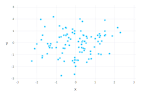

In [2]:
plot(x = x, y = y)

## Calling Python

## Performance Types

A useful tool for measuring performance is the @time macro. The following example illustrates good working style:

In [51]:
function f(n)
    s = 0
    for i = 1:n
       s += i/2
    end
    s
end

f (generic function with 1 method)

In [52]:
@time f(1)

  0.012803 seconds (1.32 k allocations: 71.960 KiB)


0.5

In [53]:
@time f(10^6)

  0.060882 seconds (3.00 M allocations: 45.788 MiB, 34.41% gc time)


2.5000025e11

For more serious benchmarking, consider the BenchmarkTools.jl package which evaluates the function multiple times in order to reduce noise.

## Workflow

## Advanced Topics

## Type-Dispatch Design

"_If it quacks like a duck, it might as well be a duck_"

This idea is central to type-based designs: __abstract types are defined by how they act__

In [2]:
my_square(x) = x^2

my_square (generic function with 1 method)

In [4]:
@code_llvm my_square(1)


define i64 @julia_my_square_61025(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, %0
  ret i64 %1
}


In [6]:
@code_llvm my_square(1.0)


define double @julia_my_square_61028(double) #0 !dbg !5 {
top:
  %1 = fmul double %0, %0
  ret double %1
}


Thus we don't need to restrict the types we allow in functions in order to get performance. That means that

In [7]:
my_restricted_square(x::Int) = x^2

my_restricted_square (generic function with 1 method)

is no more efficient than the version above, and actually generates the same exact compiled code:

In [10]:
@code_llvm my_restricted_square(1)


define i64 @julia_my_restricted_square_61057(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, %0
  ret i64 %1
}


## Type Hierarchies

In [11]:
a = 1:10
typeof(a) <: AbstractArray

true

In [12]:
fieldnames(a)

2-element Array{Symbol,1}:
 :start
 :stop 

In [17]:
@time collect(1:10000000);

  0.192011 seconds (8 allocations: 76.294 MiB, 73.18% gc time)


But creating an immutable type of two numbers is essentially free, no matter what those two numbers are:

In [15]:
@time 1:10000000;

  0.000007 seconds (5 allocations: 192 bytes)


The array takes O(n) memory to store its values while this type is O(1), using a constant 192 bytes (if the start and stop are Int64). Yet, in cases where we just want to index values, they act exactly the same.

Another nice example is the UniformScaling operator, which acts like an identity matrix without forming an identity matrix.

In [18]:
println(I[10,10]) # prints 1
println(I[10,2]) # prints 0

1
0


This can calculate expressions like A-b*I without ever forming the matrix (eye(n)) which would take O(n2) memory. 

In [19]:
This is the key idea to keep in mind when building type hierarchies: things which subtype are inheriting behavior. 

LoadError: [91msyntax: extra token "is" after end of expression[39m

In [22]:
abstract type AbstractPerson end
abstract type AbstractStudent <: AbstractPerson end
abstract type AbstractTeacher <: AbstractPerson end

type Person <: AbstractPerson
  name::String    
end
 
type Student <: AbstractStudent
  name::String  
  grade::Int
  hobby::String
end
 
type MusicStudent <: AbstractStudent
  grade::Int
end
 
type Teacher <: AbstractTeacher
  name::String
  grade::Int
end

This can be interpreted as follows. At the top we have AbstractPerson. Our interface here is "a Person is someone who has a name which can be gotten by get_name".

In [23]:
get_name(x::AbstractPerson) = x.name

get_name (generic function with 1 method)

This is because MusicStudents just want to be named whatever the trendiest band is, so we can just replace the usage of the field by the action:

In [24]:
get_name(x::MusicStudent) = "Justin Bieber"

get_name (generic function with 2 methods)

## Aprendendo mais sobre

- [A Deep Introduction to Julia for Data Science and Scientific Computing](http://ucidatascienceinitiative.github.io/IntroToJulia/) por [Chris Rackauckas](http://chrisrackauckas.com/)
- [Type-Dispatch Design: Post Object-Oriented Programming for Julia](http://www.stochasticlifestyle.com/type-dispatch-design-post-object-oriented-programming-julia/) por [Chris Rackauckas](http://chrisrackauckas.com/)
- [Introduction to Julia for Python Developers](https://www.youtube.com/watch?v=qhrY0c_BHs8) por David Higgins
- [Modern Numerical Computing with Julia](http://courses.csail.mit.edu/18.337/2017/) por Prof. Alan Edelman
- [The Julia version 0.5 Express](http://bogumilkaminski.pl/files/The%20Julia%20Express.html) por Bogumił Kamiński